### MNIST Multilayer Perceptron
![title](https://ml4a.github.io/images/figures/mnist-input.png)

<video controls src="assets/Neural Network 3D Simulation.mp4" />


In [51]:
%matplotlib inline
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

from keras.backend.tensorflow_backend import set_session

In [32]:
# Mendefinisikan Fungsi
def set_gpu_mem_alloc(mem_use):
    avail  = 4041
    percent = mem_use / avail
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = percent
    config.gpu_options.visible_device_list = "0"
    set_session(tf.Session(config=config))

set_gpu_mem_alloc(2000)

In [33]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

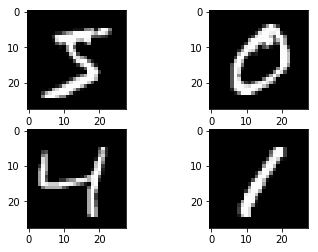

In [34]:
# apa sih isinya
f,ax = plt.subplots(2,2)
ax[0][0].imshow(x_train[0], cmap='gray')
ax[0][1].imshow(x_train[1], cmap='gray')
ax[1][0].imshow(x_train[2], cmap='gray')
ax[1][1].imshow(x_train[3], cmap='gray')

In [35]:
print('Gambar Kiri Atas   : ',y_train[0])
print('Gambar Kanan Atas  : ',y_train[1])
print('Gambar Kiri Bawah  : ',y_train[2])
print('Gambar Kanan Bawah : ',y_train[3])

Gambar Kiri Atas   :  5
Gambar Kanan Atas  :  0
Gambar Kiri Bawah  :  4
Gambar Kanan Bawah :  1


In [36]:
print("x_train shape : ", x_train.shape)
print("x_test shape  : ", x_test.shape)

x_train shape :  (60000, 28, 28)
x_test shape  :  (10000, 28, 28)


In [37]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [38]:
print(x_train.shape[0] , 'train samples')
print(x_test.shape[0]  , 'test samples')

60000 train samples
10000 test samples


In [39]:
batch_size = 128
num_classes = 10
epochs = 10

In [40]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [41]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [42]:
model = Sequential()
model.add(Dense(748, name='layer_input', activation='relu', input_shape=(784,)))
model.add(Dense(748, name='layer_hidden_satu', activation='relu'))
model.add(Dense(748, name='layer_hidden_dua', activation='relu'))
model.add(Dense(748, name='layer_hidden_tiga', activation='relu'))
model.add(Dense(num_classes, name='layer_output', activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_input (Dense)          (None, 748)               587180    
_________________________________________________________________
layer_hidden_satu (Dense)    (None, 748)               560252    
_________________________________________________________________
layer_hidden_dua (Dense)     (None, 748)               560252    
_________________________________________________________________
layer_hidden_tiga (Dense)    (None, 748)               560252    
_________________________________________________________________
layer_output (Dense)         (None, 10)                7490      
Total params: 2,275,426
Trainable params: 2,275,426
Non-trainable params: 0
_________________________________________________________________


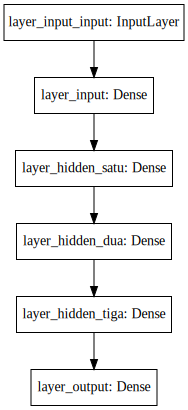

In [43]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
# Training neural network nya
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.2184 - acc: 0.9327 - val_loss: 0.1115 - val_acc: 0.9655
Epoch 2/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0894 - acc: 0.9728 - val_loss: 0.0878 - val_acc: 0.9732
Epoch 3/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0609 - acc: 0.9813 - val_loss: 0.0785 - val_acc: 0.9763
Epoch 4/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0465 - acc: 0.9857 - val_loss: 0.0727 - val_acc: 0.9802
Epoch 5/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0399 - acc: 0.9875 - val_loss: 0.0914 - val_acc: 0.9760
Epoch 6/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0349 - acc: 0.9891 - val_loss: 0.0972 - val_acc: 0.9756
Epoch 7/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0275 - acc: 0.9915 - val_loss: 0.0695 - val_acc

In [46]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10525332513
Test accuracy: 0.9768


In [72]:
model.save('mnist_dense.h5')

In [73]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [74]:
predict = model.predict(x_test, batch_size=128)

Prediction :  0


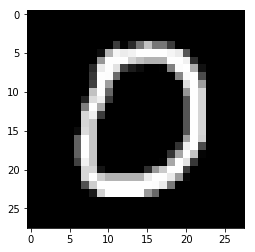

In [75]:
idx = 10
print('Prediction : ', np.argmax(predict[idx]))
plt.imshow(test_x[idx], cmap='gray')